In [1]:
from random import random
from numpy import array
from numpy import cumsum

In [2]:
#cumsum (pos1, pos1+pos2, pos1+pos2+pos3, ...)

In [3]:
def get_sequence(n_timesteps):
    # create a sequence of random numbers in [0,1]
    X = array([random() for _ in range(n_timesteps)])
    # calculate cut-off value to change class(output) values
    limit = 10/4.0
    # determine the class outcome for each item in cumulative sequence
    y = array([0 if x < limit else 1 for x in cumsum(X)])
    
    # reshape input and output data to be suitable for LSTMs
    X = X.reshape(1, n_timesteps, 1)#(samples,timesteps,features)
    y = y.reshape(1, n_timesteps, 1)

    return X,y


In [4]:
n_timesteps = 10

In [5]:
get_sequence(n_timesteps)

(array([[[0.86870974],
         [0.55062087],
         [0.52756882],
         [0.55606447],
         [0.1230529 ],
         [0.52976837],
         [0.14336751],
         [0.50387382],
         [0.79540948],
         [0.9786853 ]]]),
 array([[[0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1]]]))

In [6]:
X,y = get_sequence(10)
print(X)
print(y)

[[[0.80731644]
  [0.71304642]
  [0.85356974]
  [0.08401968]
  [0.1801382 ]
  [0.60039843]
  [0.95741963]
  [0.12910446]
  [0.33846363]
  [0.50245818]]]
[[[0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]]


In [7]:
for x in cumsum(X):
    print(x)

0.8073164351087848
1.520362853795134
2.3739325982277313
2.4579522732480306
2.6380904682606117
3.2384888960066007
4.195908530374048
4.325012987404015
4.663476616357594
5.165934797719767


In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import TimeDistributed

In [11]:
from matplotlib import pyplot
from pandas import DataFrame

# LSTM model with Backwards & Forward 

In [29]:
def get_lstm_model(n_timesteps,backwards):
    model = Sequential()
    model.add(LSTM(20,input_shape = (n_timesteps,1),return_sequences = True,go_backwards = backwards))
    model.add(TimeDistributed(Dense(1,activation = 'sigmoid')))
    model.compile(optimizer = 'adam',loss = 'binary_crossentropy')
    return model

# Bidirectional with Mode

In [57]:
def get_bi_lstm_model(n_timesteps,mode):
    model = Sequential()
    model.add(Bidirectional(LSTM(20,return_sequences = True),input_shape = (n_timesteps,1),merge_mode=mode))
    model.add(TimeDistributed(Dense(1,activation = 'sigmoid')))
    model.compile(optimizer = 'adam',loss = 'binary_crossentropy')
    return model

In [58]:
def train_model(model,n_timesteps):
    loss = list()
    for epoch in range(250):
        # generate new random sequence for every epoch
        X,y = get_sequence(n_timesteps)
        # fit model for one epoch on this sequence
        hst = model.fit(X,y,epochs = 1,batch_size = 1)
        loss.append(hst.history['loss'][0])
    return loss
        

        

In [59]:
 results = DataFrame()

In [60]:
#LSTM forwards
model = get_lstm_model(n_timesteps,False)
results['lstm_forwards'] = train_model(model,n_timesteps)

Epoch 1/1
1/1 [==============================] - 3s 3s/step - loss: 0.6962
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.6794
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.6591
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.6371
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.6814
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.6755
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.6817
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.6798
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.6499
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6631
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.6331
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.6532
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.6255
E

Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.4689
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.7410
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.4071
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.4852
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.4957
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.5733
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.7202
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.3954
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.4630
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3913
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.3229
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.4536
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.4640

Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.5832
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.3628
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.2993
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.3720
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3237
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.3461
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3419
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.2709
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.3202
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.2834
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.2842
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.3283
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.4488

In [61]:
#LSTM backwards
model = get_lstm_model(n_timesteps,True)
results['lstm_backwards'] = train_model(model,n_timesteps)

Epoch 1/1
1/1 [==============================] - 3s 3s/step - loss: 0.7066
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.6873
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.6724
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.6824
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.7183
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.6996
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.6976
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.6965
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.6912
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.7183
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.7288
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.7357
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.7271
E

Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.4204
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.5028
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.4976
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.4937
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.4952
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.4161
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.8210
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.4160
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.4848
Epoch 1/1
1/1 [==============================] - 0s 9ms/step - loss: 0.6192
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.3539
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.3959
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3235


Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.2939
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.6816
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3552
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.4860
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.4412
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3541
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3283
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3438
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.6548
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.3340
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3714
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.3793
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.3269

In [62]:
#Bidirectional concat
model =  get_bi_lstm_model(n_timesteps,'concat')
results['bi_lstm'] =  train_model(model,n_timesteps)

Epoch 1/1
1/1 [==============================] - 5s 5s/step - loss: 0.6823
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.6799
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.6848
Epoch 1/1
1/1 [==============================] - 0s 9ms/step - loss: 0.6819
Epoch 1/1
1/1 [==============================] - 0s 9ms/step - loss: 0.6806
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.6762
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.6639
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.6628
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.6650
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.6644
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.6633
Epoch 1/1
1/1 [==============================] - 0s 10ms/step - loss: 0.6751
Epoch 1/1
1/1 [==============================] - 0s 8ms/step - loss: 0.6602
Epoc

Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.1604
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.1621
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.2929
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.1855
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.1409
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.1883
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.1710
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.2389
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.5914
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.1987
Epoch 1/1
1/1 [==============================] - 0s 11ms/step - loss: 0.1981
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.1588
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.4826

Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.8141
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.4296
Epoch 1/1
1/1 [==============================] - 0s 17ms/step - loss: 0.2012
Epoch 1/1
1/1 [==============================] - 0s 16ms/step - loss: 0.0994
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.1902
Epoch 1/1
1/1 [==============================] - 0s 12ms/step - loss: 0.1446
Epoch 1/1
1/1 [==============================] - 0s 13ms/step - loss: 0.1478
Epoch 1/1
1/1 [==============================] - 0s 19ms/step - loss: 0.2047
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.1141
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.1987
Epoch 1/1
1/1 [==============================] - 0s 14ms/step - loss: 0.1077
Epoch 1/1
1/1 [==============================] - 0s 15ms/step - loss: 0.2884
Epoch 1/1
1/1 [==============================] - 0s 18ms/step - loss: 0.1951

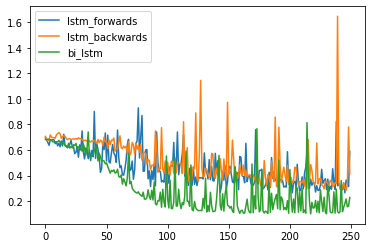

In [63]:
results.plot()
pyplot.show()